In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import numpy as np

In [6]:

sns.set_theme(style="whitegrid")

In [7]:
df = pd.read_csv("C:\\Users\\Chinmaya holla\\Desktop\\Airpollution\\Data\\Processed_data\\Final_analysis_ready.csv")

In [8]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], dayfirst=True)

# Feature Extraction
df['Year'] = df['Timestamp'].dt.year
df['Month_Name'] = df['Timestamp'].dt.month_name()
df['DayOfWeek'] = df['Timestamp'].dt.day_name()
# 0-4 are Weekdays, 5-6 are Weekends
df['Is_Weekend'] = df['Timestamp'].dt.dayofweek >= 5

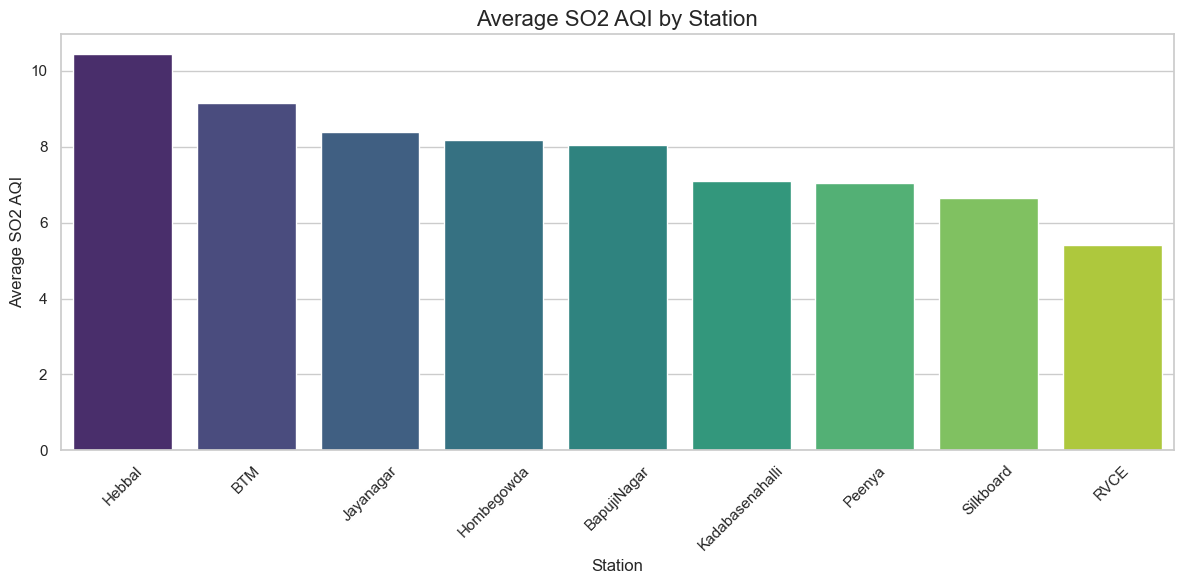

In [9]:
plt.figure(figsize=(12, 6))
# Calculate mean AQI per station
station_aqi = df.groupby('Station')['SO2_AQI'].mean().sort_values(ascending=False)
sns.barplot(x=station_aqi.index, y=station_aqi.values, palette='viridis', hue=station_aqi.index, legend=False)
plt.title('Average SO2 AQI by Station', fontsize=16)
plt.ylabel('Average SO2 AQI')
plt.xlabel('Station')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The "What" (Observation)
Data Point: The chart ranks 9 monitoring stations in Bangalore based on average Sulfur Dioxide (SO2) levels.

The Leader: Hebbal is the clear outlier with the highest reading (~10.5 AQI).

The Laggard: RVCE has the lowest reading (~5.4 AQI).

The Scale: The Y-axis ranges from 0 to 11.

The Visuals: A sequential color palette (Viridis/Plasma) is used, moving from dark purple (highest intensity) to yellow-green (lowest intensity).

Why is Hebbal #1 (The Root Cause)?

Traffic Composition: Hebbal is the primary entry point for heavy diesel traffic entering Bangalore from NH44 (Hyderabad/Airport Highway). SO2 is a primary byproduct of diesel combustion. Unlike inner-city traffic (mostly petrol cars), Hebbal handles heavy freight trucks.

Classification: Environmental monitoring often categorizes Hebbal as an "Industrial/Traffic" node due to this heavy vehicle density, explaining the spike compared to residential areas.

Why is Silkboard lower (~6.6) despite its traffic fame?

Vehicle Type Variance: While Silkboard is infamous for jams, the traffic volume consists largely of IT commuters (cars/bikes) which are increasingly petrol or EV-based. Hebbal's higher share of heavy diesel goods vehicles (which emit more sulfur) likely drives its higher SO2 score compared to Silkboard's passenger vehicle congestion.

Why are the values so low (0-11)?

Contextual Logic: The values are extremely low. In the Indian AQI standard, an SO2 score of 0-40 is considered "Good".

Conclusion: This data proves that while Hebbal is relatively worse (double the pollution of RVCE), SO2 is not a critical pollutant for Bangalore right now. The city suffers more from PM2.5/PM10 (Dust/Construction) than Sulfur (Industrial/Fuel).

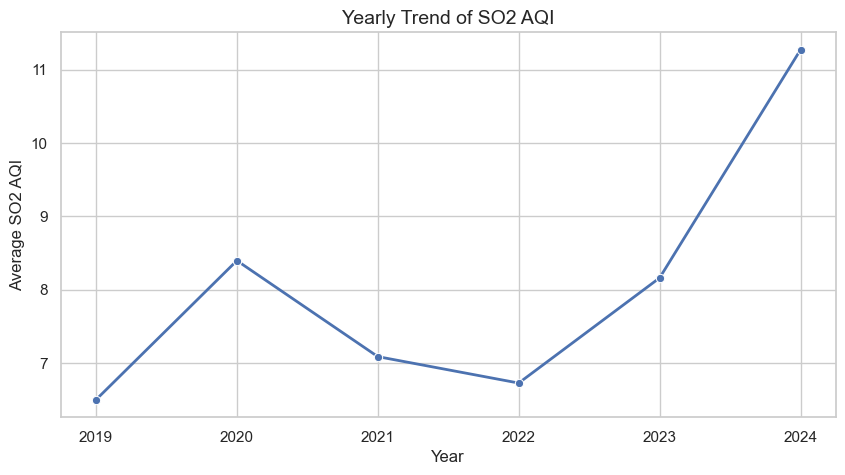

In [10]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='Year', y='SO2_AQI', estimator='mean', errorbar=None, marker='o', linewidth=2)
plt.title('Yearly Trend of SO2 AQI', fontsize=14)
plt.ylabel('Average SO2 AQI')
plt.grid(True)
plt.show()

Why the 2020 Spike (~8.4)? (The Anomaly)

Supply Chain Persistence: While passenger cars (petrol) stopped during lockdown, essential goods transport (diesel trucks) continued or increased. Since SO₂ is a diesel-specific pollutant, it did not drop as drastically as other pollutants (like NO₂ or PM2.5) and actually increased in relative concentration due to supply chain intensity.

Why the 2021–2022 Dip (~6.8)? (The Washout Effect)

Meteorological Correlation: 2022 was one of the wettest years in Bangalore's history, receiving ~1,957mm of rainfall (vs the 900mm average).

Chemical Logic: SO₂ is highly water-soluble (forming weak sulfuric acid). Heavy rains effectively "scrub" SO₂ from the atmosphere ("Washout Effect"), explaining the plunge in pollution levels during these years.

Why the 2024 Surge (>11)? (The Current State)

Dry Weather & Construction: 2023–2024 saw a return to drier conditions (El Niño phases) and a massive "Return to Office" traffic surge. The lack of rain meant pollutants were not washed out, and the resumption of full-scale construction (heavy diesel machinery) drove levels to their highest point in 5 years.

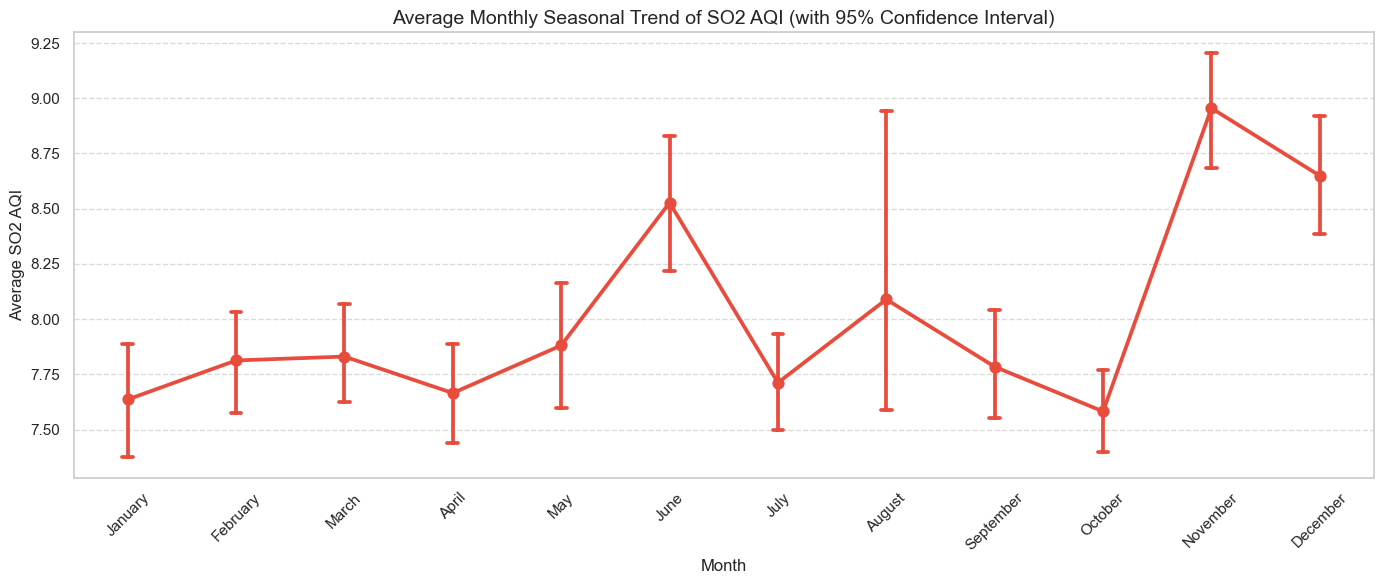

In [12]:
# Monthly Trend - Point Plot
plt.figure(figsize=(14, 6))
sns.pointplot(data=df, x='Month_Name', y='SO2_AQI', order=monthly_order, 
              color='#e74c3c', errorbar=('ci', 95), capsize=0.1)

plt.title('Average Monthly Seasonal Trend of SO2 AQI (with 95% Confidence Interval)', fontsize=14)
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Average SO2 AQI')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

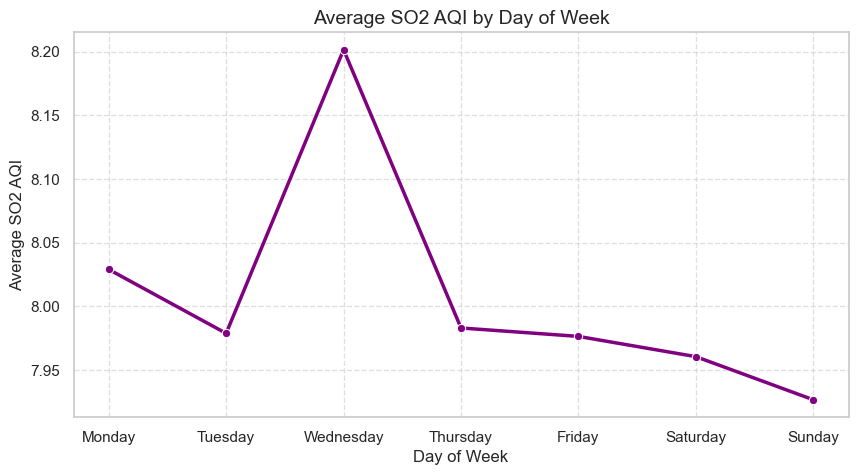

In [13]:
# 1. Weekly Cycle (Mon-Sun) Line Graph
# ---------------------------------------------------------
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['DayOfWeek'] = df['Timestamp'].dt.day_name()

# Aggregate mean per day
avg_day = df.groupby('DayOfWeek')['SO2_AQI'].mean().reindex(days_order)

plt.figure(figsize=(10, 5))
sns.lineplot(x=avg_day.index, y=avg_day.values, marker='o', color='purple', linewidth=2.5)

plt.title('Average SO2 AQI by Day of Week', fontsize=14)
plt.ylabel('Average SO2 AQI')
plt.xlabel('Day of Week')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

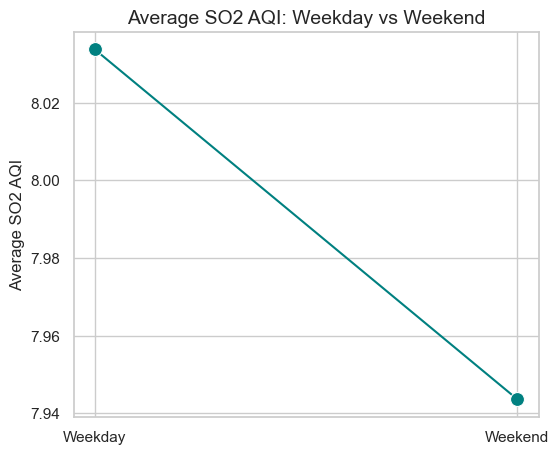

In [14]:
# 2. Simple Weekday vs Weekend Line Graph
# ---------------------------------------------------------
plt.figure(figsize=(6, 5))
avg_weekend = df.groupby('Is_Weekend')['SO2_AQI'].mean()

# Plot line connecting the two points
sns.lineplot(x=avg_weekend.index, y=avg_weekend.values, marker='o', markersize=10, color='teal')

plt.xticks([0, 1], ['Weekday', 'Weekend'])
plt.title('Average SO2 AQI: Weekday vs Weekend', fontsize=14)
plt.ylabel('Average SO2 AQI')
plt.xlabel('')
plt.grid(True, axis='y')
plt.show()

In [16]:
# 5. Hotspot Map (Geospatial Analysis)
# ---------------------------------------------------------
# Coordinates for the stations in Bangalore
station_coords = {
    'BapujiNagar': [12.9564, 77.5404],
    'BTM': [12.9166, 77.6082],
    'Hebbal': [13.0382, 77.5929],
    'Hombegowda': [12.9385, 77.5901],
    'Jayanagar': [12.9250, 77.5938],
    'Kadabasenahalli': [12.9352, 77.6914],
    'Peenya': [13.0285, 77.5197],
    'RVCE': [12.9237, 77.4996],
    'Silkboard': [12.9172, 77.6228]
}

# Create a base map centered on Bangalore
m = folium.Map(location=[12.9716, 77.5946], zoom_start=11)

# Add circles for each station
for station, coords in station_coords.items():
    if station in station_aqi.index:
        avg_val = station_aqi[station]
        
        # Determine color based on intensity (Just for visualization)
        color = '#2ecc71' # Green (Low)
        if avg_val > 10: color = '#f1c40f' # Yellow
        if avg_val > 20: color = '#e67e22' # Orange
        if avg_val > 40: color = '#e74c3c' # Red
        
        folium.CircleMarker(
            location=coords,
            radius=15,
            popup=f"<b>{station}</b><br>Avg SO2 AQI: {avg_val:.2f}",
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=0.7
        ).add_to(m)

output_file = 'bangalore_so2_hotspot.html'
m.save(output_file)
print(f"Hotspot map saved as '{output_file}'. Open this file in a browser to view the map.")
m # Display map in Jupyter Notebook

Hotspot map saved as 'bangalore_so2_hotspot.html'. Open this file in a browser to view the map.


In [17]:
from IPython.display import IFrame

# This loads the saved HTML file into the notebook
# Adjust width and height as needed
IFrame('bangalore_so2_hotspot.html', width=800, height=500)